# 3D Plotting in Matplotlib

We can do 3D plotting using the `mplot3d` library

In [2]:
from mpl_toolkits import mplot3d

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We can create 3 dimensional axes by adding the parameter `projection='3d'` to plt

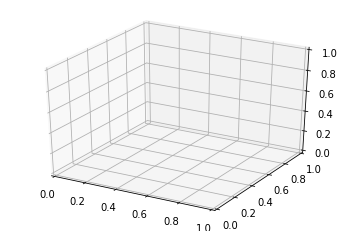

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

### 3D lineplots and scatter plots

- 3D lineplots can be created using `ax.plot3D`
- 3D scatter plots can be created using `ax.scatter3D`

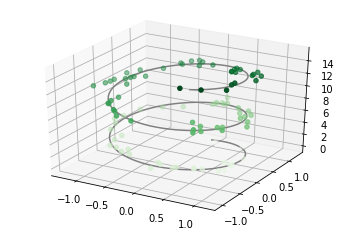

In [5]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### 3D Contour Plots

`ax.contour3D`

In [6]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

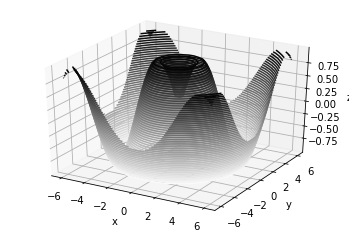

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

We can use the `view_init` method to change the elevation and azimuthal angles

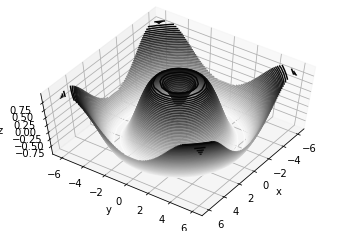

In [8]:
ax.view_init(60, 35)
fig

### Wireframes and surface plots


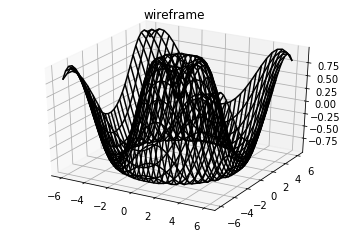

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception. 

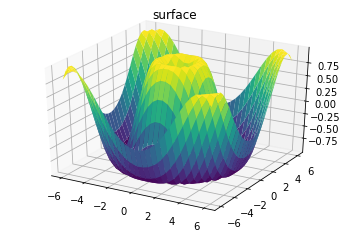

In [10]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

We can create a partial polar grid to give us a slice of the function we are visualizing. 

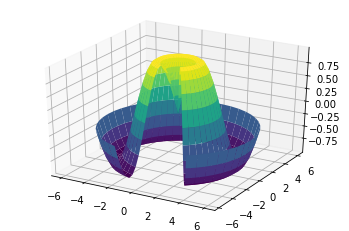

In [11]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

### Surface Triangulations

Sometimes, a scatter plot does not give us what we want

In [12]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

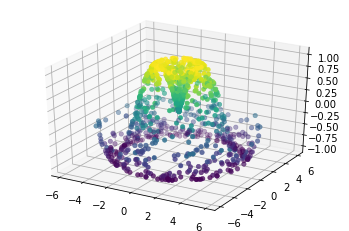

In [13]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

We can use `ax.plot_trisurf` that creates a surface by finding a set of triangles formed between adjacent points 

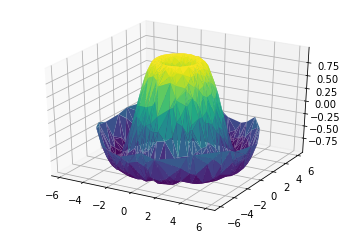

In [14]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

### Example: Visualizing a Mobius Strip

A Mobius strip is a strip with a half twist. Despite it's appearance, it only has a single side. 

We need 2 dimensions to create the strip:
- θ, the amount of twist at each point of the loop, ranging from [0,2pi]
- w, the width of the strip,ranging from [-1,1]

In [16]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

To map the strip into 3 dimensions (x,y,z), we need to realize that there are 2 rotations happening:
- the position of the loop about its center (what we've called θ)
- the twisting of the strip about its axis (we'll call this ϕ)

For a Möbius strip, we must have the strip makes half a twist during a full loop, or Δϕ=Δθ/2.

In [17]:
phi = 0.5 * theta

In [18]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

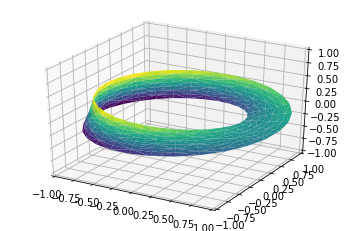

In [19]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);